In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [6]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [10]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [11]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

r=model.fit(X_train_scaled, y_train,validation_split=0.33, epochs=5)

Epoch 1/5
58/58 [==============================] - 156s 2s/step - loss: 0.9898 - acc: 0.6305 - val_loss: 0.6267 - val_acc: 0.7734
Epoch 2/5
58/58 [==============================] - 149s 3s/step - loss: 0.4870 - acc: 0.8302 - val_loss: 0.5122 - val_acc: 0.8196
Epoch 3/5
58/58 [==============================] - 120s 2s/step - loss: 0.3663 - acc: 0.8844 - val_loss: 0.4582 - val_acc: 0.8339
Epoch 4/5
58/58 [==============================] - 160s 3s/step - loss: 0.3040 - acc: 0.9012 - val_loss: 0.4334 - val_acc: 0.8559
Epoch 5/5
58/58 [==============================] - 133s 2s/step - loss: 0.2571 - acc: 0.9251 - val_loss: 0.4131 - val_acc: 0.8603


In [13]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 47s 2s/step - loss: 0.4394 - acc: 0.8388


[0.43935298919677734, 0.8387799859046936]

In [14]:
y_pred=model.predict(X_test_scaled)

29/29 [==============================] - 50s 2s/step


In [15]:
y_pred

array([[-4.770106  ,  3.5657837 , -1.3809572 ,  1.1782659 , -2.6381903 ],
       [-2.054778  ,  0.68677914, -5.9878135 , -0.9532113 , -0.45046973],
       [-5.8281317 , -2.3032665 ,  5.775021  , -1.4926164 , -3.2624054 ],
       ...,
       [-0.70645255, -4.3918047 , -4.4779644 , -0.02670038,  0.6099998 ],
       [ 2.7845852 , -4.142548  , -7.948266  , -3.1274645 , -2.1738212 ],
       [ 0.4993801 , -5.8520756 , -4.6127086 ,  2.9273114 , -2.0364015 ]],
      dtype=float32)

In [16]:
import matplotlib.pyplot as plt

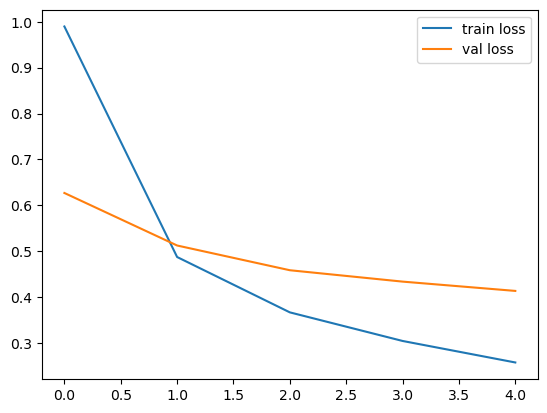

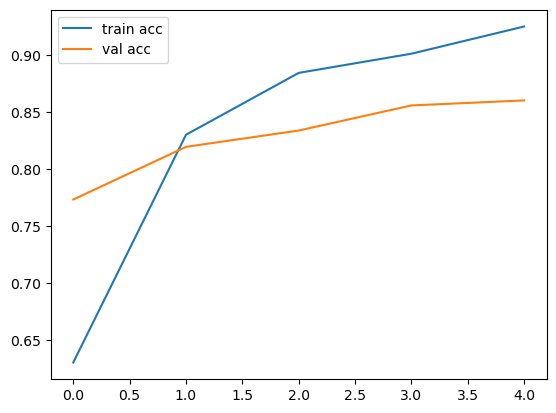

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')